In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from colorama import Fore, Style
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [10]:
df=pd.read_csv('UberDataset.csv')
df.head(2)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN


In [11]:
df.info

<bound method DataFrame.info of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1

In [12]:
df['PURPOSE'] = df['PURPOSE'].fillna("UNKNOWN")

In [13]:
df.dropna(inplace = True)

In [14]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [17]:
df.describe()

,MILES
count,1155.000000
mean,10.566840
std,21.579106
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,310.300000


In [18]:
df['CATEGORY'].value_counts()

CATEGORY
Business    1078
Personal      77
Name: count, dtype: int64

In [19]:
total_miles = df['MILES'].sum()
print('Total miles driven:', total_miles)

Total miles driven: 12204.7


In [20]:
avg_miles_per_trip = df['MILES'].mean()
print('Average miles per trip:', avg_miles_per_trip)

Average miles per trip: 10.566839826839827


In [21]:
missing_purpose_count = df['PURPOSE'].isnull().sum()
print('Number of missing values in PURPOSE column:', missing_purpose_count)

Number of missing values in PURPOSE column: 0


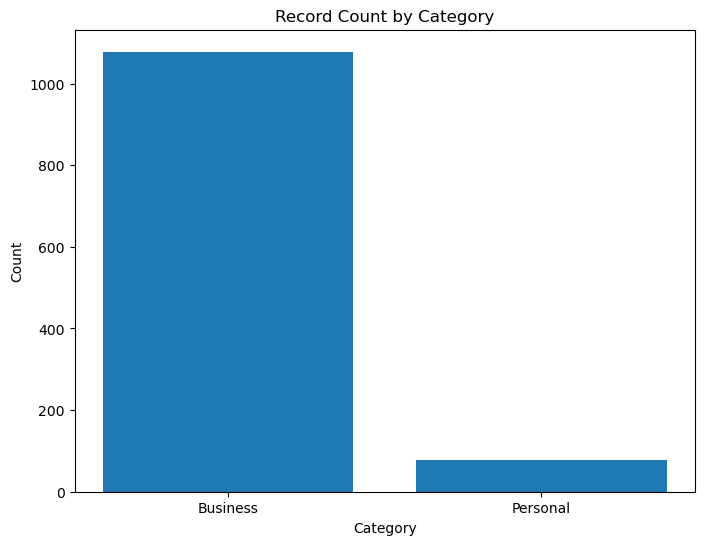

In [22]:
category_counts = df['CATEGORY'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Record Count by Category')
plt.show()

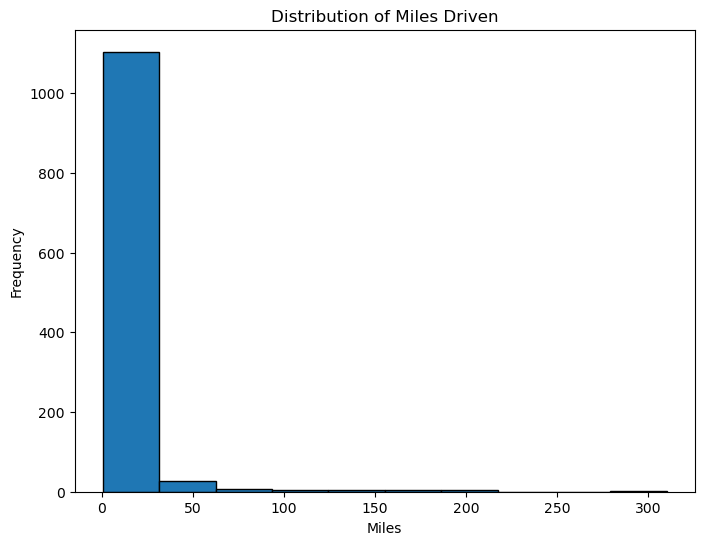

In [23]:
plt.figure(figsize=(8, 6))
plt.hist(df['MILES'], bins=10, edgecolor='black')
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.title('Distribution of Miles Driven')
plt.show()

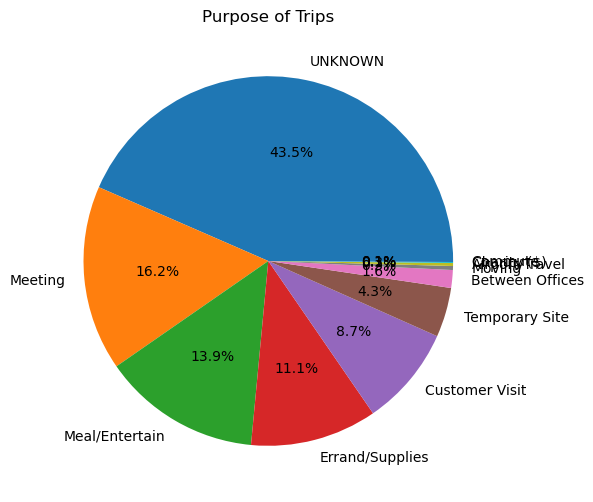

In [24]:
purpose_counts = df['PURPOSE'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(purpose_counts.values, labels=purpose_counts.index, autopct='%1.1f%%')
plt.title('Purpose of Trips')
plt.show()

In [25]:
df = df[df['START_DATE'] != "Totals"]

df['START_DATE'] = pd.to_datetime(df['START_DATE'])

df.set_index('START_DATE', inplace=True)

daily_miles = df.resample('D')['MILES'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_miles.index, daily_miles.values)
plt.xlabel('Date')
plt.ylabel('Miles Driven')
plt.title('Miles Driven Over Time')
plt.show()

ValueError: time data "1/13/2016 13:54" doesn't match format "%m-%d-%Y %H:%M", at position 23. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

<Figure size 1000x600 with 0 Axes>

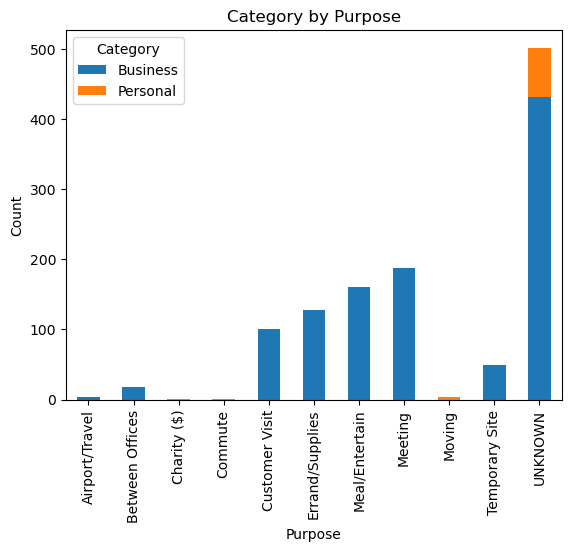

In [26]:
category_purpose = df.pivot_table(index='PURPOSE', columns='CATEGORY', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
category_purpose.plot(kind='bar', stacked=True)
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.title('Category by Purpose')
plt.legend(title='Category')
plt.show()

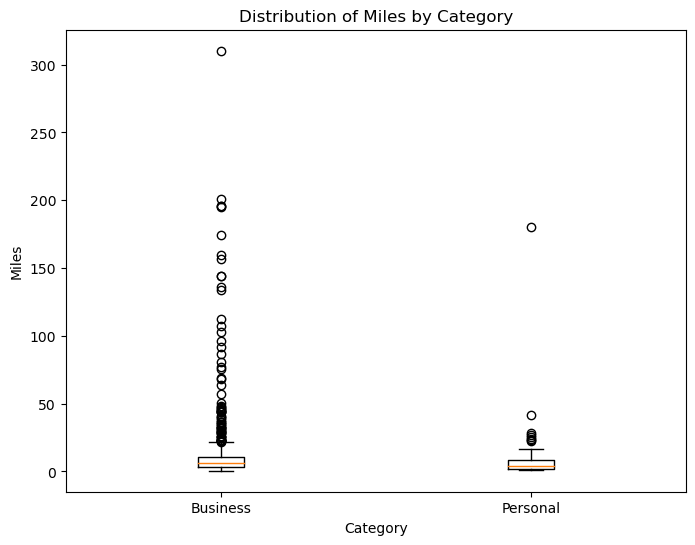

In [27]:
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['CATEGORY'] == 'Business']['MILES'], df[df['CATEGORY'] == 'Personal']['MILES']], labels=['Business', 'Personal'])
plt.xlabel('Category')
plt.ylabel('Miles')
plt.title('Distribution of Miles by Category')
plt.show()

In [30]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ---------------- --------------------- 20.5/47.0 kB 330.3 kB/s eta 0:00:01
     --------------------------------- ---- 41.0/47.0 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 471.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.0 MB 960.0 kB/s eta 0:01:46
   ---------------------------------------- 0.2/101.0 MB 1.9 MB/s eta 0:00:52
   ---------------------------------------- 0.3/101.0 MB 2.6 MB/s eta 0:00:39
   ---------------------------------------- 0.3/101.0 MB 2.3 MB/s eta 0:00:45
   ---------------------------------------- 0.3/101.0 MB 2.3 MB/s eta 0:00:45
   ------------

In [32]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/b3/f8/ee33e36194eb03a76eccf3adac3fba51f0e56fbd20609bb531659d48d3cb/lightgbm-4.1.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 1.4 MB/s eta 0:00:01
   ----- ---------------------------------- 0.2/1.3 MB 2.1 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 3.9 MB/s eta 0:00:01
   ------------------- -------------------- 0.6/1.3 MB 3.6 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.3 MB 3.5 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 3.6 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 3.5 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 3.3 MB/s eta 0:00:01
   -------------------------------------- - 1.2/1.3 MB 3.2 MB/s eta 0:00:01
   -------------------------------------

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.impute import SimpleImputer
from catboost import CatBoostRegressor
import lightgbm as lgb

In [34]:
features = ['START', 'STOP', 'CATEGORY', 'PURPOSE']

In [35]:
X = df[features]
X = pd.get_dummies(X) 
y = df['MILES']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'Linear SVR' : LinearSVR(),
}

Results for Linear Regression:
Mean Squared Error: 8.063879059467617e+27
R-squared Score: -1.3867543492804579e+25


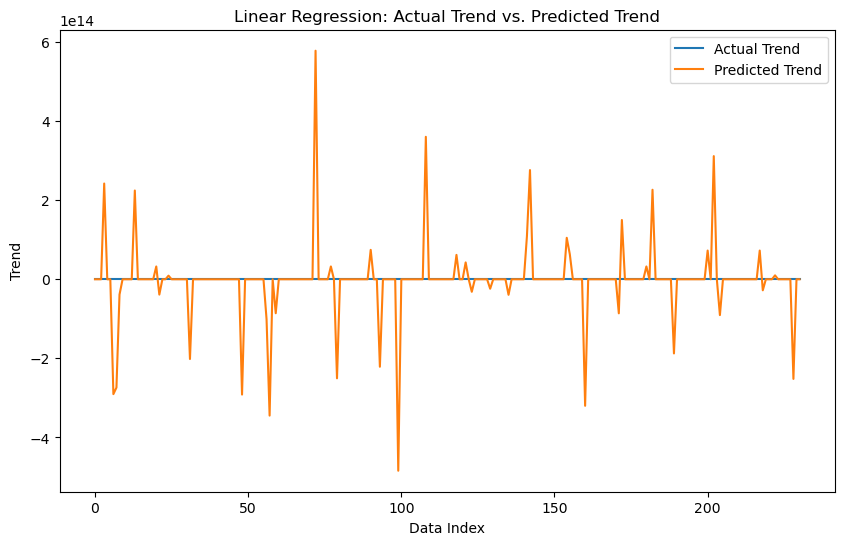


Results for Decision Tree:
Mean Squared Error: 454.1098230665515
R-squared Score: 0.21906223103735967


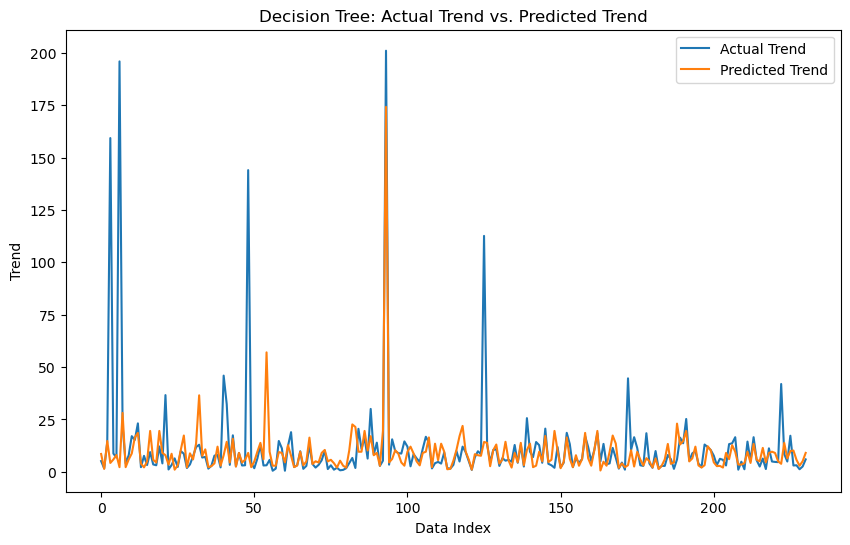


Results for Random Forest:
Mean Squared Error: 488.9904655569758
R-squared Score: 0.15907759793140863


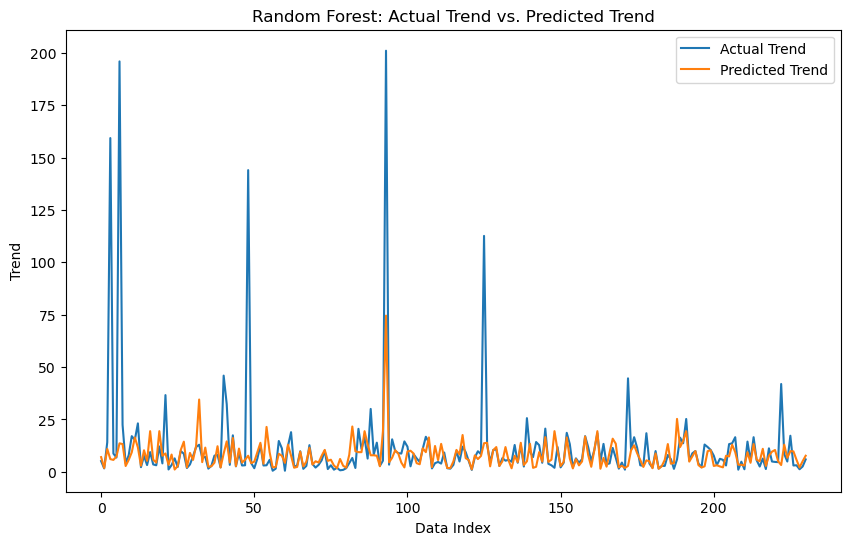


Results for SVR:
Mean Squared Error: 590.5617286213676
R-squared Score: -0.015595645277864056


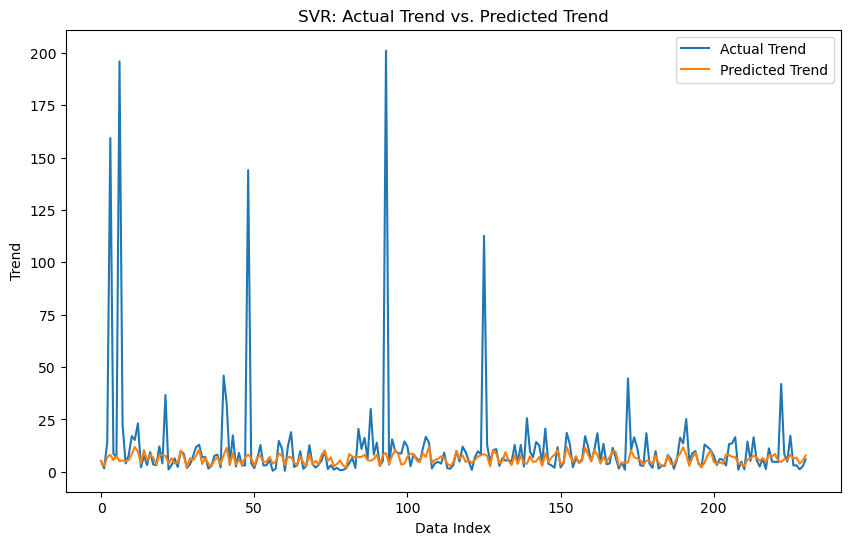


Results for XGBoost:
Mean Squared Error: 440.03761880286635
R-squared Score: 0.2432623589444327


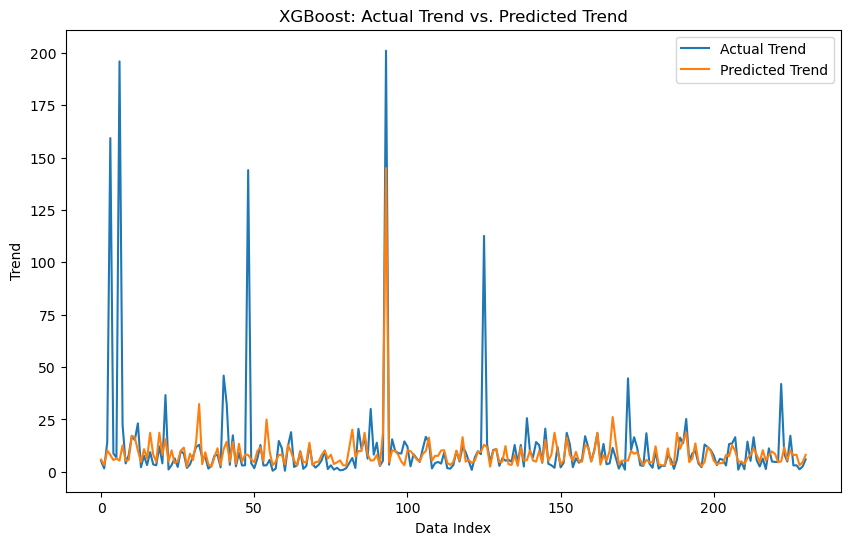


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000277 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 52
[LightGBM] [Info] Number of data points in the train set: 924, number of used features: 26
[LightGBM] [Info] Start training from score 10.328788
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

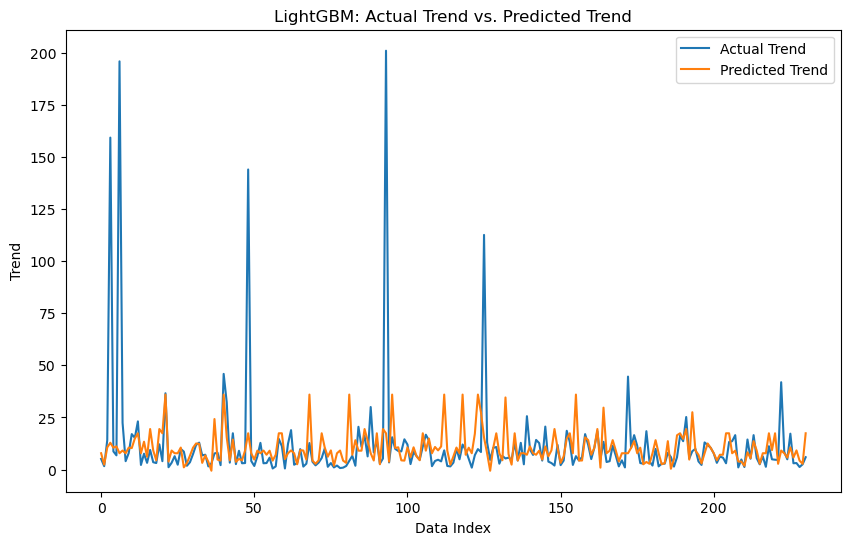


Results for Gradient Boosting Regressor:
Mean Squared Error: 485.57866388449753
R-squared Score: 0.16494491163155223


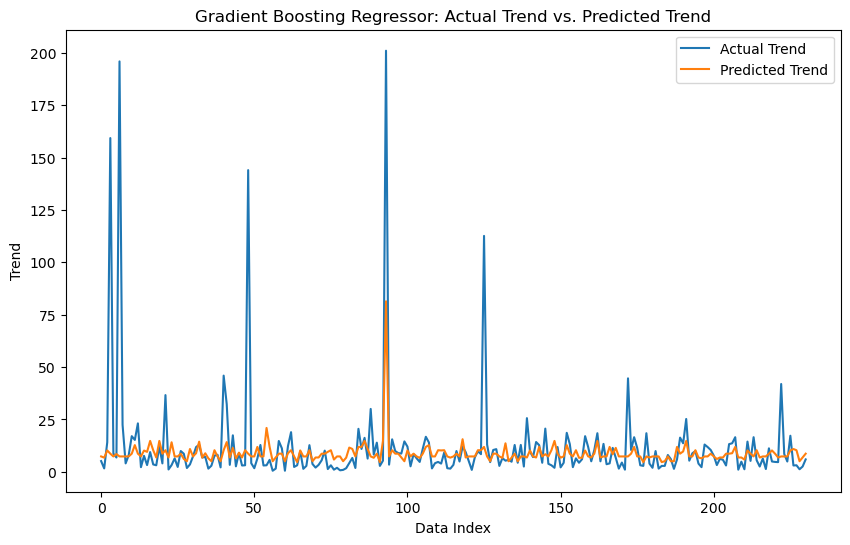


Results for ADA Boost:
Mean Squared Error: 562.9739268892478
R-squared Score: 0.031847407571728104


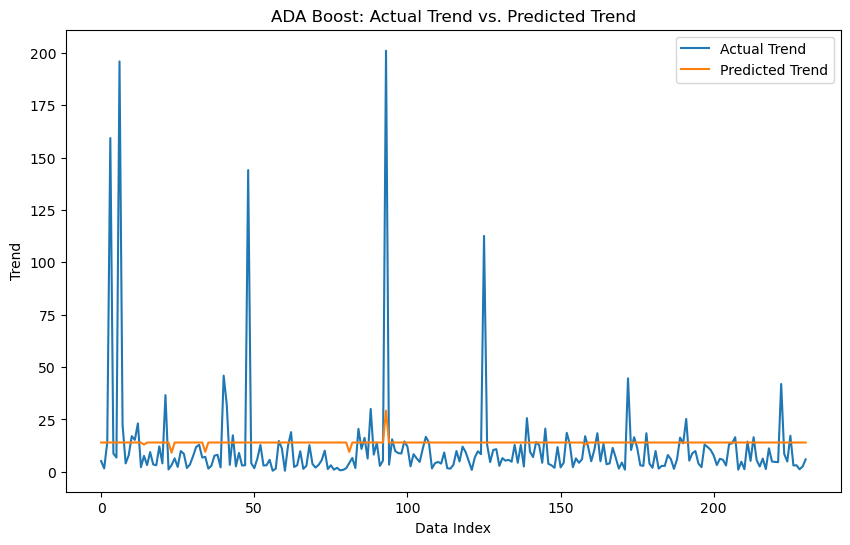


Results for Linear SVR:
Mean Squared Error: 584.165637458946
R-squared Score: -0.004596215385040292


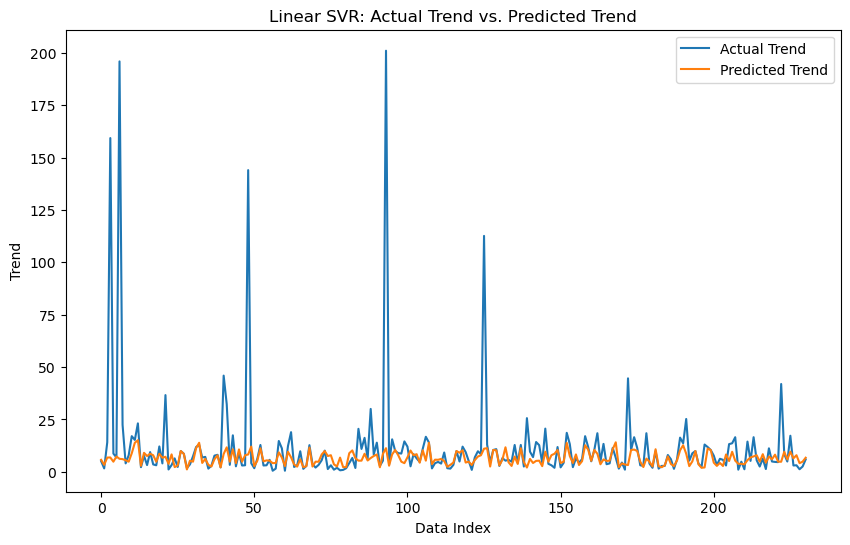

In [38]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost','Linear SVR']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"Results for {name}:")
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared Score: {r2}")
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data Index')
    plt.ylabel('Trend')
    plt.title(f'{name}: Actual Trend vs. Predicted Trend')
    plt.legend()
    plt.show()
    accuracy.append(r2)
    print()